In [1]:
# General Data Processing and Visualization Tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

In [2]:
# Specific Models for Testing
from sklearn.naive_bayes import ComplementNB

In [3]:
# Visualization Tools
from yellowbrick.classifier import ClassificationReport
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

def make_vis(model_clf,train,val):
  viz = ClassificationReport(model_clf, classes=['0', '1'], support = True)
  viz.fit(train, np.ravel(label_train))
  viz.score(val, np.ravel(label_val))
  viz.poof()

def make_cmatrix(predictions,clf_name):
  cm = confusion_matrix(label_val, predictions)
  cm_display = ConfusionMatrixDisplay(cm,display_labels=['Normal','Fraud'])
  cm_display.plot(values_format='d')
  plt.title("Confusion Matrix: "+clf_name)
  plt.grid(False)
  plt.show()

In [4]:
data_raw = pd.read_csv('../data/creditcard.csv', sep=",")

In [5]:
data_only = data_raw.drop(["Class"],axis=1)
labels_only = data_raw.take([-1],axis=1)

In [6]:
from sklearn.model_selection import train_test_split
train_raw, val_raw, label_train, label_val = train_test_split(data_only, labels_only,\
                                                                stratify=labels_only,\
                                                                test_size = 0.2,\
                                                               random_state = 255)

In [7]:
# NB requires all positives so will minmax scale
from sklearn.preprocessing import MinMaxScaler
minmaxScaler = MinMaxScaler()
minmax_train = minmaxScaler.fit_transform(train_raw)
minmax_val = minmaxScaler.transform(val_raw)

## NB

In [8]:
nb_clf = ComplementNB().fit(minmax_train,np.ravel(label_train))

prediction_nb = nb_clf.predict(minmax_val)
print(classification_report(np.ravel(label_val), prediction_nb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.74      0.81      0.77        98

    accuracy                           1.00     56962
   macro avg       0.87      0.90      0.89     56962
weighted avg       1.00      1.00      1.00     56962



/Users/ryshu/anaconda3/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


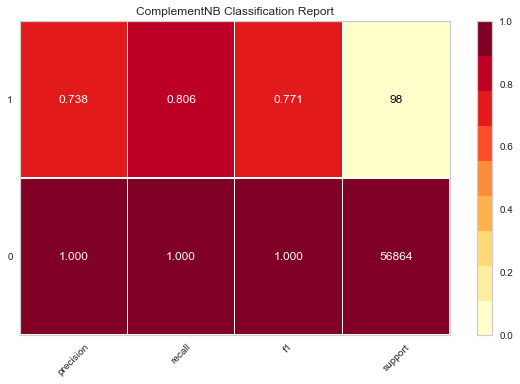

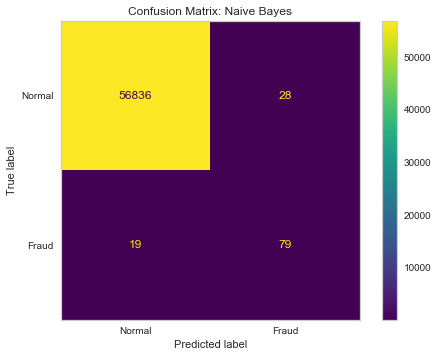

In [9]:
make_vis(nb_clf,minmax_train,minmax_val)
make_cmatrix(prediction_nb,"Naive Bayes")

# Results

Results about equal to Trees, however can only be done on min-max scaled data